In [1]:
#Library yang di butuhkan
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import ImageFile
import os
!pip install tensorflowjs


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls "/content/drive/My Drive/langit/"

test  train  trainmy_model.h


In [4]:
import pathlib
train_dir = '/content/drive/My Drive/langit/train'

test_dir = '/content/drive/My Drive/langit/test'

train_mendung_dir = os.path.join(train_dir, 'Mendung')
train_cerah_dir = os.path.join(train_dir, 'Cerah')
train_berawan_dir = os.path.join(train_dir, 'Berawan')


test_mendung_dir = os.path.join(test_dir, 'Mendung')
test_cerah_dir = os.path.join(test_dir, 'Cerah')
test_berawan_dir = os.path.join(test_dir, 'Berawan')

print('total training Cerah images :', len(os.listdir(train_cerah_dir)))
print('total training Mendung images :', len(os.listdir(train_mendung_dir)))
print('total training Berawan images :', len(os.listdir(train_berawan_dir)))


print('total test Mendung images :', len(os.listdir(test_mendung_dir)))
print('total test Cerah images :', len(os.listdir(test_cerah_dir)))
print('total test Berawan images :', len(os.listdir(test_berawan_dir)))

total training Cerah images : 512
total training Mendung images : 514
total training Berawan images : 515
total test Mendung images : 124
total test Cerah images : 120
total test Berawan images : 120


In [5]:
train_datagen = ImageDataGenerator(rescale = 1.0/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.1,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale = 1.0/255)
    

In [6]:
#Pengaplikasiannya

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (150, 150),
                                                    color_mode = 'rgb',
                                                    class_mode='categorical',
                                                    batch_size = 32)

test_generator = test_datagen.flow_from_directory(
                                                  test_dir,
                                                  target_size = (150, 150),
                                                  color_mode = 'rgb',
                                                  class_mode='categorical',
                                                  batch_size = 32)

Found 1541 images belonging to 3 classes.
Found 363 images belonging to 3 classes.


In [9]:
model = tf.keras.models.Sequential([
  
    tf.keras.layers.Conv2D(16, (3,3), activation='relu',input_shape=(150,150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    ##tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 17, 17, 64)      

In [11]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
ImageFile.LOAD_TRUNCATED_IMAGES = True
# training 
history = model.fit (train_generator,
                     epochs = 150,
                     validation_data = test_generator,
                     verbose=1)

Epoch 1/150
49/49 [==============================] - 562s 12s/step - loss: 1.0327 - accuracy: 0.4413 - val_loss: 0.8317 - val_accuracy: 0.6749
Epoch 2/150
49/49 [==============================] - 104s 2s/step - loss: 0.8380 - accuracy: 0.6295 - val_loss: 0.7435 - val_accuracy: 0.7135
Epoch 3/150
49/49 [==============================] - 103s 2s/step - loss: 0.7262 - accuracy: 0.6937 - val_loss: 0.5817 - val_accuracy: 0.7493
Epoch 4/150
49/49 [==============================] - 103s 2s/step - loss: 0.6507 - accuracy: 0.7080 - val_loss: 0.5612 - val_accuracy: 0.7521
Epoch 5/150
49/49 [==============================] - 100s 2s/step - loss: 0.6162 - accuracy: 0.7320 - val_loss: 0.5148 - val_accuracy: 0.7658
Epoch 6/150
49/49 [==============================] - 103s 2s/step - loss: 0.6178 - accuracy: 0.7255 - val_loss: 0.7976 - val_accuracy: 0.6061
Epoch 7/150
49/49 [==============================] - 104s 2s/step - loss: 0.6032 - accuracy: 0.7411 - val_loss: 0.5910 - val_accuracy: 0.7190
Epoch

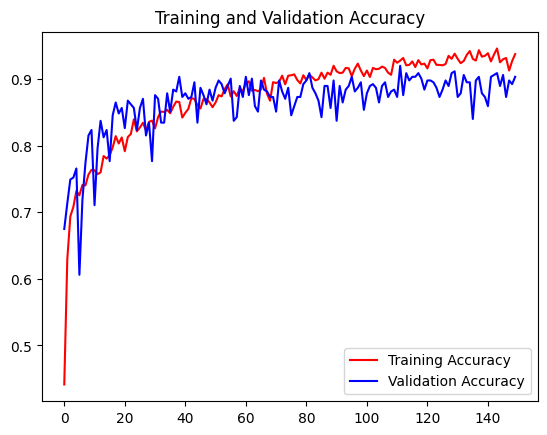

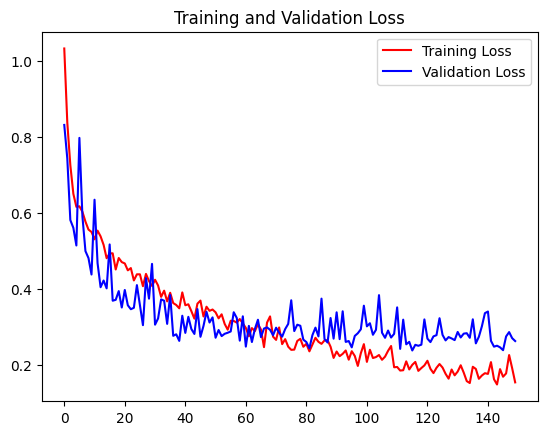

In [13]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc = 'best')
plt.show()

plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.legend(loc = 'best')
plt.show()

Saving cloudy69.jpg to cloudy69.jpg
1/1 [==============================] - 0s 27ms/step
cloudy69.jpg
Ini adalah cuaca Berawan


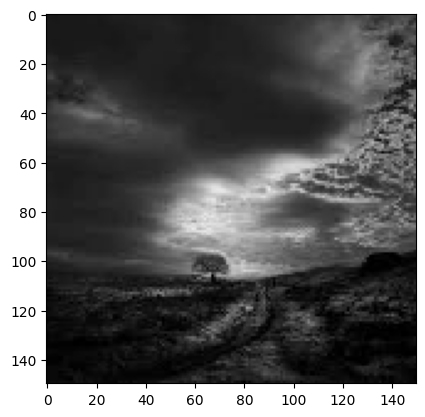

In [25]:
# Prediksi dengan data test
import numpy as np
from keras.preprocessing import image
from google.colab import  files


uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = tf.keras.utils.load_img(path, target_size = (150, 150))
  imgplot = plt.imshow(img)
  x = tf.keras.utils.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 100)

  print(fn)

  class_list = os.listdir(train_dir)
  
  for j in range(42):
    if classes[0][j] == 1. :
      print('Ini adalah cuaca', class_list[j])
      break

In [26]:
def download_history():
  import pickle
  from google.colab import files

  with open('history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

  files.download('history.pkl')

download_history()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [27]:
from tensorflow.keras.models import load_model
save_model = "/content/drive/MyDrive/trainmy_modelaug.hdf5"
model.save(save_model)
from google.colab import files
files.download('/content/drive/MyDrive/trainmy_modelaug.hdf5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!tensorflowjs_converter --input_format=keras {save_model} ./
from google.colab import files
files.download('/content/model.json')